# Analysis of Cryptocurrency prices with focus on Bitcoin and exploration of potential predictors of Crypto prices 
Cryptocurrencies have emerged as a disruptive store of value to traditional regulated currency types. While their rapid price and subsequent decline over a relatively short period of these has widely captured public and media attention, relatively little published studies have been done in terms of understanding the underlying factors that influence the prices of these crypto currencies.  
Unlike regulated currencies whose supply is determined by a centralized monetary authority, crypto-currencies are unique in that both their supply and demand side dynamics work in a completely de-centralized model. This project aims to delve deeper into the market price dynamics of cryto-currencies by analyzing the following factors:
1. Analyze market price behavior of different crypto currencies
2. Explore relationships between price behavior of different cyptos
3. Evaluate different forecasting models and potential predictors of crypto prices
4. Gain insight into the behaviour of cryptocurrecy prices using statistical analysis

Author:  Karthikeyan V,  Wits University  

# Source of data
Kaggle dataset at https://www.kaggle.com/jessevent/all-crypto-currencies
This is an xls file that as per the Kaggle description contains 'Daily crypto markets open, close, low, high data for every token ever

# Part 1: Preliminary Data Exploration and Data Wrangling
1. Check number of rows, duration of time series, monthly highs and lows of each crypto
2. Total number of crypto and different number of slugs
3. Plot daily price (high, low and close) of each crypto, monthly averages over a time series
4. Validate the above against public data sources

# Some early questions to be considered
We will seek to explore the nature of bitcoin price movements by answering the following questions:
1. What are the different factors that show a high degree of co-relation which crypto-prices, taking BTC, ETH and a few of the other major ones? 
2. What is the extent of co-relation of cryto-prices with crypto-volumes? 
3. Can news sentiment of each crypto be obtained to determine extent of co-relation with the corresponding crypto? 
4. Are there any possible predictors of crypto currencies given that it is a de-centralized and potentially
unregulated store of value? 
5. Is there any auto-correlation in the data? 
6. Can the result be understood? 

These were some of the initial questions I framed as I set out.  As the work below progressed, I found that some of these questions were replaced by ones which seemed more relevant to the objective at hand. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp

df = pd.read_csv('crypto-markets.csv')


# How many different crypto currencies are present in my dataset and what are they? 

There are a total of 1482 crypto currencies (or cryptocs for short) in the data set containing daily market prices for 5 years ranging from 28-04-2013 to 21-02-2018.  
Note that not all cryptocs will have market prices for all dates as the market entry date for each crypto varies with bitcoin being the oldest. 

In [2]:
sym = df["symbol"]
print (sym.describe())
print (df.columns.values)
print(df['date'].head())
print(df['date'].describe())

count     702166
unique      1482
top          NMC
freq        1761
Name: symbol, dtype: object
['slug' 'symbol' 'name' 'date' 'ranknow' 'open' 'high' 'low' 'close'
 'volume' 'market' 'close_ratio' 'spread']
0    2013-04-28
1    2013-04-29
2    2013-04-30
3    2013-05-01
4    2013-05-02
Name: date, dtype: object
count         702166
unique          1761
top       2018-02-21
freq            1506
Name: date, dtype: object


# Basic descriptive statistics on the bitcoin prices used to validate against other publicly available sources

In [3]:
btc = df[df.symbol=='BTC']
display(btc.describe())

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,1761.0,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1.761000e+03,1761.000000,1761.000000
mean,1.0,1485.191857,1542.602413,1423.396559,1490.973947,8.627147e+08,2.391001e+10,0.545899,119.205855
std,0.0,2959.024244,3101.024780,2788.441525,2966.544907,2.802911e+09,4.985893e+10,0.297931,363.362138
min,1.0,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.792550e+08,0.000000,0.000000
25%,1.0,274.770000,279.930000,268.800000,274.900000,1.640000e+07,3.890430e+09,0.286700,6.330000
50%,1.0,481.810000,495.340000,472.700000,483.340000,4.382500e+07,6.842470e+09,0.570000,14.560000
75%,1.0,871.390000,901.940000,834.150000,872.600000,1.324290e+08,1.251170e+10,0.811900,49.050000
max,1.0,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11,1.000000,4110.400000


The movement in price of bitcoin can be seen in the 'close' column above - starting from USD 68 in 2013 to USD 19497 in 2018 - the min and max values demonstrate this.   

# Part 2: A little more of Exploratory Data Analysis
Here I go deeper into the crypto data sets by plotting price and volume plots for bitcoin and other cryptocs and look for any clues for possible relationships that I can use for statistical forecasting and predictive analysis

# Plotting bitcoin price and volume movements within the entire data set

In [4]:
btc_date = btc['date']
btc_close = btc['close']
btc_volume = btc['volume']
btc_date.values
btc_close_by_date = pd.Series(btc_close.values, index=btc_date.values)
btc_volume_by_date = pd.Series(btc_volume.values, index=btc_date.values)

In [5]:
btc_plot = pd.DataFrame(btc_close_by_date, columns=['btc_close'])

In [6]:
start_date = btc_plot.index.values[0]
obs = btc_plot.index.nunique()
rng = pd.PeriodIndex(start=start_date, freq='D', periods=obs)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

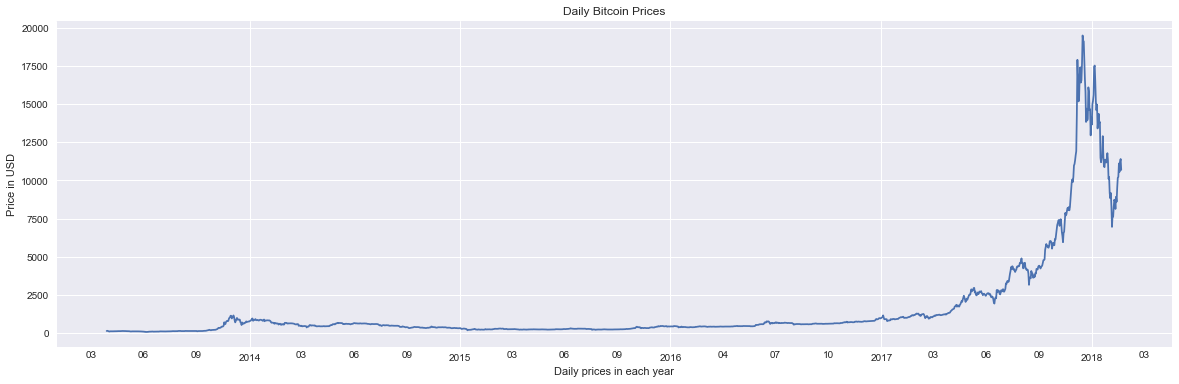

In [8]:
#btc_plot.plot()
btc_plot.index = pd.to_datetime(btc_plot.index.values)
ax = btc_plot['btc_close'].plot(title='Daily Bitcoin Prices', 
                                  figsize = (20,6))
ax.set_xlabel('Daily prices in each year')
ax.set_ylabel('Price in USD');
#ax.set_xticks(np.arange(2013,2018))
ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))
#ax.xaxis.set_minor_formatter(mp.dates.AutoDateFormatter(mp.dates.AutoDateLocator()))

As reported in the popular media, bitcoin price volatility appears to be a recent phenomenon when everyone and their grandmother started buying into bitcoin in late 2017 and early 2018 leading to the price boom and crash shortly after.... Should we really believe this explanation?


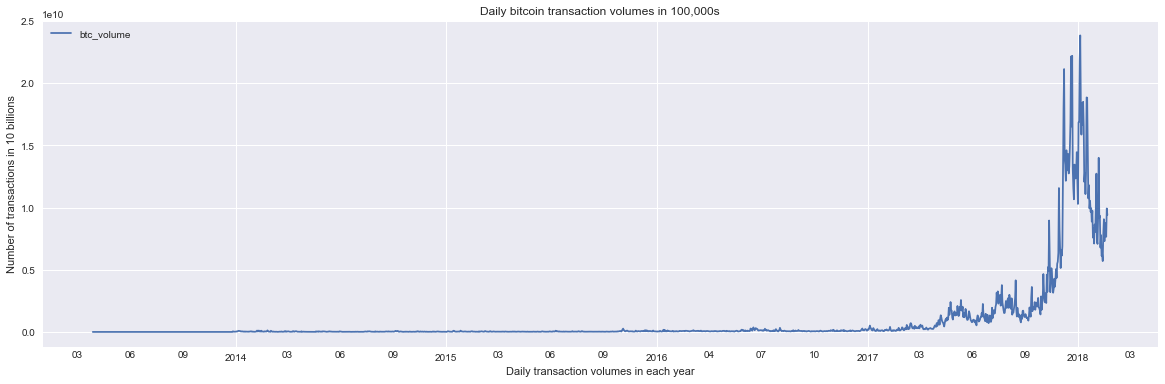

In [9]:
btc_volume_plot = pd.DataFrame(btc_volume_by_date, columns=['btc_volume'])
btc_volume_plot.index = pd.to_datetime(btc_volume_plot.index.values)
ax = btc_volume_plot.plot(figsize = (20,6), title = 'Daily bitcoin transaction volumes in 100,000s')
ax.set_xlabel('Daily transaction volumes in each year')
ax.set_ylabel('Number of transactions in 10 billions');
ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))

The number of transactions in bitcoins show a similar pattern of movement to bitcoin prices, indicating a high correlation between the two. 

# Monthly distribution of BTC across different years

We take a closer look at the montly variation in prices in each year of it's existence by plotting them on the same graph, with each colored line representing the price movement in that given year, with the X-axis representing the month in that year

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

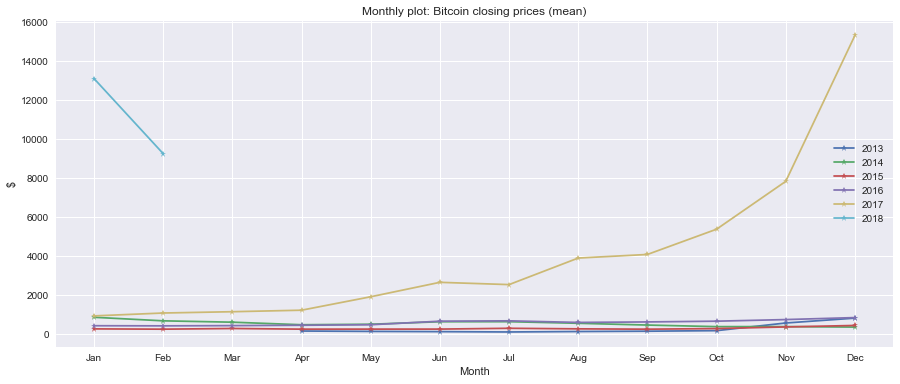

In [10]:
btc_pv = pd.pivot_table(btc_plot, index=btc_plot.index.month, columns=btc_plot.index.year, values='btc_close', aggfunc='mean')
btc_pv.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = btc_pv.plot(title="Monthly plot: Bitcoin closing prices (mean)", 
                 figsize=(15,6), marker='*')
ax.set_xlabel('Month')
ax.set_ylabel('$')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(btc_pv.index)

While the price variations are clearly visible above, the absolute movement in prices in the early years is not clearly seen due to the significant difference in scale on the Y-axis.   To deal with this, we plot a yearly view below.

# Looking more closely... Zooming into yearly trends instead of just a macro level

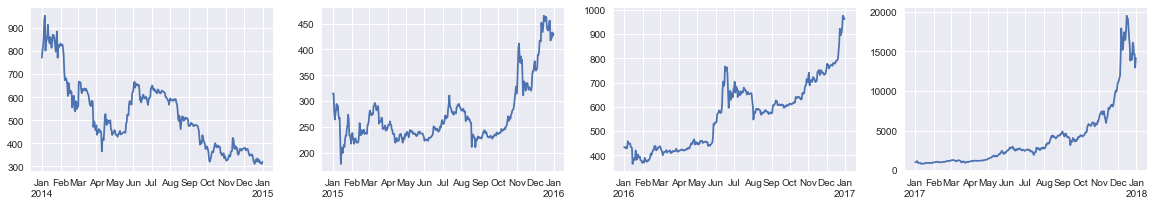

In [11]:
fig = plt.figure(figsize=[20,3]);
# subplots
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = plt.subplot2grid((1,4), (0,3))
arr_ax = [ax1,ax2, ax3, ax4]
for i in range(2014,2018):
    btc_plot[str(i)].btc_close.plot(ax=arr_ax[i-2014])

Observation:  Price drop of BTC in Aug 2017 followed by flat trend till Nov 2017 can be attributed to a fork off BTC to form a new crypto called Bitcoin Cash (BCH).   See BCH chart below for corresponding rising trend of BCH during the same period.

BTC has been on a rising trend right from Year 2 of it's existence.  Even considering it's recent price drop, the 3 plots above show a rising trend.  It's too early to write it off as a spent phenomenon!


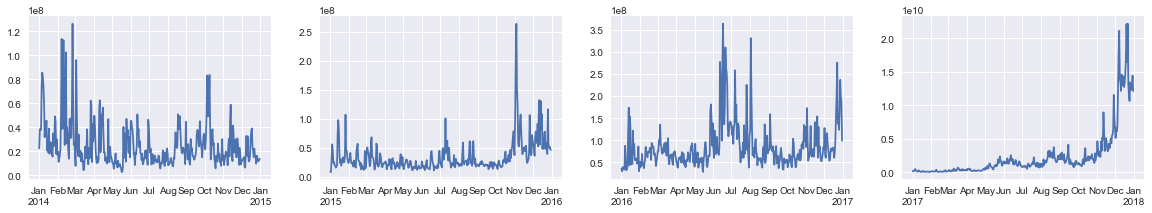

In [12]:
btc_scatter = pd.DataFrame(btc_plot)
btc_scatter['btc_volume'] = btc_volume_plot['btc_volume']

fig = plt.figure(figsize=[20,3]);
# subplots
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = plt.subplot2grid((1,4), (0,3))
arr_ax = [ax1,ax2, ax3, ax4]
for i in range(2014,2018):
    btc_plot[str(i)].btc_volume.plot(ax=arr_ax[i-2014])

And this explanation is borne out by the volume movements as well.   Over the full timeline, the number of bitcoins changing hands appears to have been fairly stable till the recent boom/bust cycle.   So does this confirm the widely held view that there was a buying frenzy which drove up the prices?  Then, what brought the prices down?

# Scatter plot of BTC Prices and Volumes

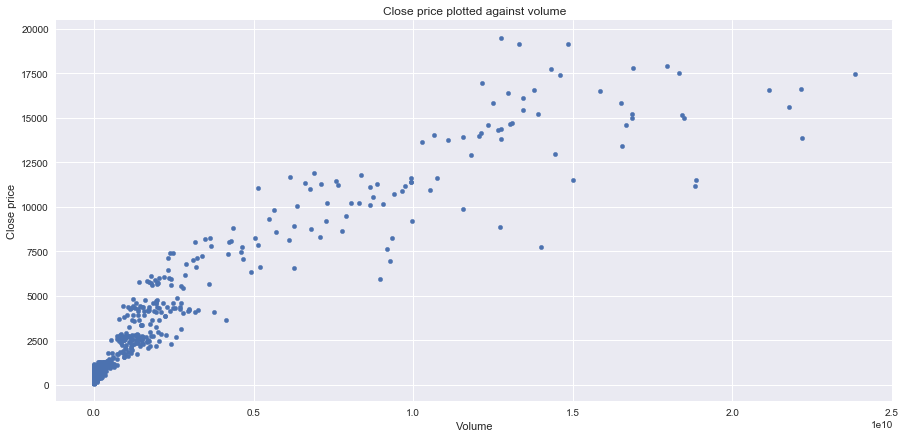

In [13]:
ax = btc_scatter.plot.scatter(y='btc_close', 
                             x='btc_volume', 
                             alpha=1.0, 
                             figsize=(15,7), 
                             title='Close price plotted against volume')
ax.set_xlabel('Volume')
ax.set_ylabel('Close price');

Volume and price seem to be correlated which is confirmed by the corr coeff below

# Calculate correlation coefficient of Bitcoin prices on any given day to it's volume

In [14]:
btc_scatter['btc_close'].corr(btc_scatter['btc_volume'])

0.9407775614620477

There is a very high correlation between the price and volumes of bitcoin on any given day which points to an hypothesis that volumes can be used to predict prices.  
Potential causality warning: there could be a 'follow the herd' mentality at work in daily movement of prices instead of any fundamentals at work.  However, co-relation does not imply causality

# Plot the following top 5 cryptocurrencies by market cap in addition to BTC
1. ETH - Etherium
2. XRP - Ripple
3. BCH - Bitcoin cash
4. LTC - Litecoin

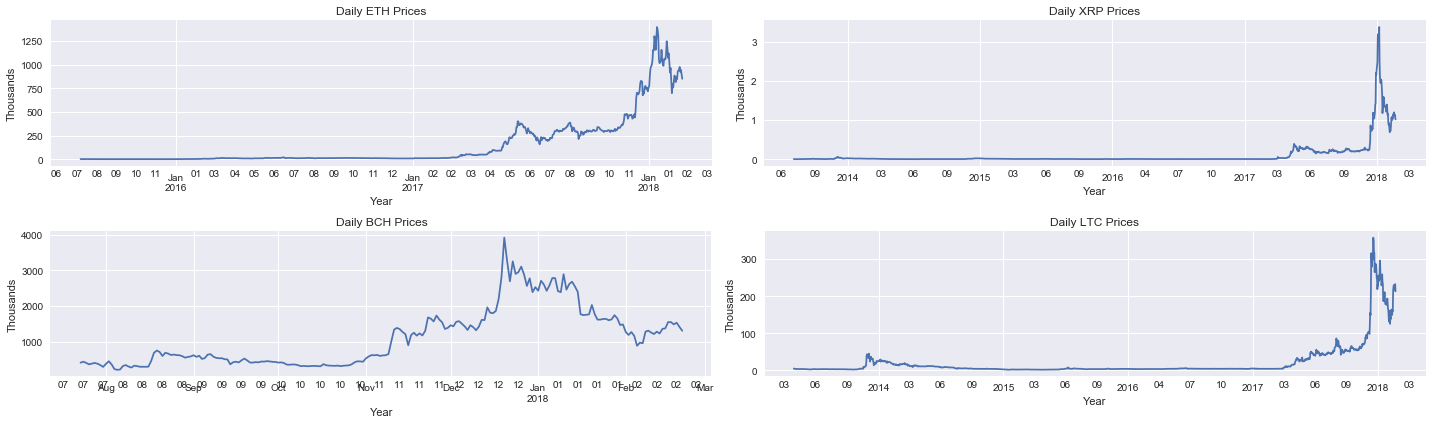

In [15]:
def plot_crypto(crypto, ax):
    btc = df[df.symbol==crypto]
    
    btc_date = btc['date']
    btc_close = btc['close']
    btc_volume = btc['volume']
    
    btc_close_by_date = pd.Series(btc_close.values, index=btc_date.values)
    btc_volume_by_date = pd.Series(btc_volume.values, index=btc_date.values)
    
    btc_plot = pd.DataFrame(btc_close_by_date, columns=['btc_close'])
    
    btc_plot.index = pd.to_datetime(btc_plot.index.values)
    ax = btc_plot['btc_close'].plot(title=str('Daily '+ crypto + ' Prices'), figsize = (20,6), ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Thousands')
    #ax.set_xticks(np.arange(2013,2018))
    ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))
    #ax.xaxis.set_minor_formatter(mp.dates.AutoDateFormatter(mp.dates.AutoDateLocator()))
    
    
fig = plt.figure(figsize=[20,6]);
# subplots
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))
arr_ax = [ax1,ax2, ax3, ax4]

arr_cryp = ["ETH", "XRP", "BCH", "LTC"]
for i in range(0, len(arr_ax)):
    plot_crypto( arr_cryp[i], arr_ax[i])
    
fig.tight_layout() 

All the four major cryptos have had a similar run with prices peaking in recent times.   Bitcoin cash is however more interesting given that 

a) It is much younger crypto launched in Aug 2017 with prices peaking in Dec 2017  
b) There seems to be a negative correlation with BTC prices during the same period. 

# Histogram plot by market value of all cryptos

Text(0,0.5,'Number of Crypto Currencies')

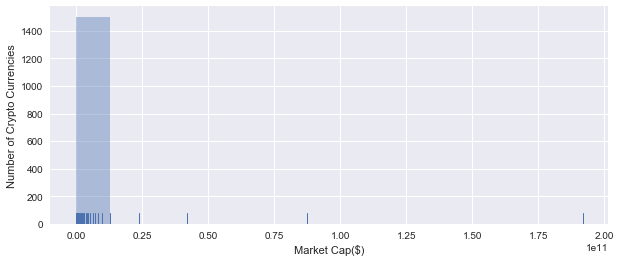

In [16]:
# select date
fig = plt.figure(figsize=[10,4]);
curr_date = "2018-02-21"
df_mcap = df[df.date==curr_date]
ax = sns.distplot(df_mcap.market, hist = True, rug=True, kde=False, bins=15)
ax.set_xlabel("Market Cap($)");
ax.set_ylabel("Number of Crypto Currencies")

As can be see above, only 5 crypto currencies have a market value of more than 12B USD, with all the remaining ones having a much smaller market cap

# What are the top 20 cryptos by market value and what does the distribution of the rest look like?

These top 20 cryptos account for 88.21% of the total market value of ALL cryptos


Bitcoin             39.457068
Ethereum            17.966825
Ripple               8.677196
Bitcoin Cash         4.931563
Litecoin             2.625962
Cardano              2.001981
NEO                  1.706016
Stellar              1.517603
EOS                  1.298420
Dash                 1.117494
Monero               0.978792
IOTA                 1.083628
NEM                  0.892096
Ethereum Classic     0.782731
TRON                 0.634059
VeChain              0.607531
Lisk                 0.546602
Tether               0.458252
Bitcoin Gold         0.457348
Qtum                 0.469052
Name: mktshare, dtype: float64

Text(0,0.5,'Number of Crypto Currencies')

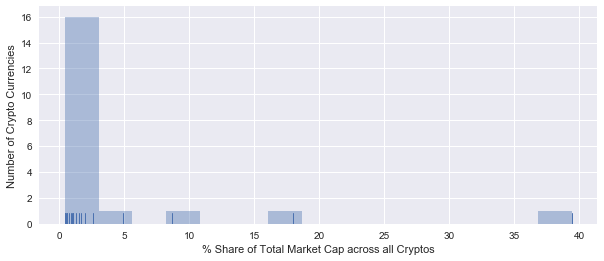

In [17]:
fig = plt.figure(figsize=[10,4]);
df_mcap_by_name = pd.DataFrame(df_mcap, columns = {'slug', 'market', 'name'})
df_mcap_by_name.index = df_mcap.name.values
df_mcap_by_name['mktshare'] = df_mcap_by_name['market'] *100 / df_mcap_by_name.market.sum()
subtotal = df_mcap_by_name.market.head(20).sum() * 100 / df_mcap_by_name.market.sum()
print("These top 20 cryptos account for " + str(round(subtotal,2)) + "% of the total market value of ALL cryptos")
display(df_mcap_by_name.mktshare.head(20))
ax = sns.distplot(df_mcap_by_name.mktshare.head(20), hist = True, rug=True, kde=False, bins=15)
ax.set_xlabel("% Share of Total Market Cap across all Cryptos")
ax.set_ylabel("Number of Crypto Currencies")

Less than 2% of all available cryptocs account for 88% of the total crypto market value.   This raises some interesting areas to be explored in future studies:
1. There is possibly some merit in taking a closer look at these other 98% crytocurrencies beyond the top 5.  
2. Look at a different grouping or classification of cryptocs by industry use cases instead of labelling all of them as 'crypto-currencies' as some could be derivations of other cryptocs.  This would make a meaningful analysis feasible of these other cryptocs.

# Scatter plot of Price vs Volume for ETH

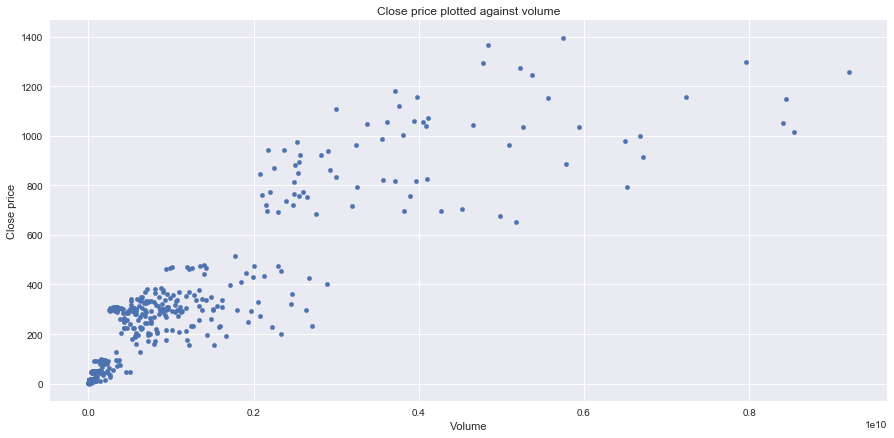

In [18]:
eth= df[df.symbol=='ETH']
eth = eth.set_index(eth['date'])
ax = eth.plot.scatter(y='close', 
                             x='volume', 
                             alpha=1.0, 
                             figsize=(15,7), 
                             title='Close price plotted against volume')
ax.set_xlabel('Volume')
ax.set_ylabel('Close price');


Correlation of price to volume exists in ETH too but to a lesser extent than Bitcoin

In [19]:
eth['close'].corr(eth['volume'])
# To do: Use ETH volumes to find correlation against bitcoin prices, however only consider dates when both are available else corr() throws a NaN error
#eth['close'].corr(btc_scatter['btc_volume'])

0.9078817093311724

# Consolidating findings from data analysis and forming ideas for modelling

So by this stage, I had a pretty good sense of the trend and variation in the top crypto prices and their volumes. I also realized that there were a different of different predictors I could consider.  To make this effort bounded and focus on a few learning objectives that could be conclusive, I decided to focus on one or two specific cryptoc - BTC and ETH (Bitcoin and Etherium).  I also decided to drop any analysis of exogenous predictor variables (outside of my chosen data set and domain of interest).  For example, my early idea of using news sentiment of cryptocs as a predictor variable now took a backseat to the following new priorities that I set.  
1. Examine autocorrelation within cypto market prices, for BTC and ETH
2. Co-relation of BTC with other cryptos like ETH
3. Predictive models using linear regression and multiple regression
4. Residual analysis and modelling errors
5. Frameing hypothesis and calculating p-value
6. Calculate Akaike's information criteria - AIC and BIC 
7. Analyse trend and seasonanlity in BTC prices
8. Use the above insights to design a more sophistical model like ARIMA an compare against a far simpler model like Naive Forecasts

# Part 3: Modelling of BTC prices using different forecasting techniques

As I began, I had this very simplistic view that volumes could be used as a predictor for prices.  The following sections describe various prediction models that I build to convince myself whether this could or could not work. 

# Using linear regression to predict prices based on volume (based on a single predictor)

,btc_close,btc_volume
count,365.000000,3.650000e+02
mean,4006.033644,2.382867e+09
std,4053.192193,3.786476e+09
min,777.760000,6.085170e+07
25%,1187.870000,3.326030e+08
50%,2589.410000,1.182870e+09
75%,4578.770000,2.219410e+09
max,19497.400000,2.219800e+10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             btc_prices   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2373.
Date:                Sat, 26 May 2018   Prob (F-statistic):          2.69e-161
Time:                        14:49:05   Log-Likelihood:                -3180.9
No. Observations:                 365   AIC:                             6366.
Df Residuals:                     363   BIC:                             6374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1630.5250     91.461     17.828      0.000    1450.666    1810.384
btc_volumes  9.969e-07   2.05e-08     48.717      0.000    9.57e-07    1.04e-06
==============================================================================
Omnibus:                       84.082   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.479
Skew:                          -0.605   Prob(JB):                    3.19e-193
Kurtosis:                      10.538   Cond. No.                     5.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

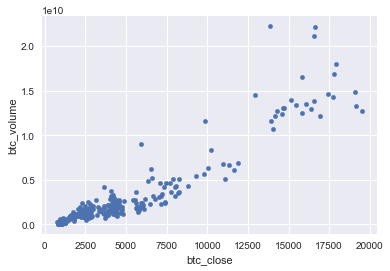

In [20]:
import statsmodels.formula.api as sm

btc_training = btc_scatter['2017']
btc_validation = btc_scatter[ (btc_scatter.index >= '01-01-2015') & (btc_scatter.index <= '31-12-2015') ]

#btc_training['log_volumes'] = 

#eth_training = eth[ (eth.index >= '01-01-2017') & (eth.index <= '31-12-2017') ]

display(btc_training.describe())
btc_prices = btc_training['btc_close']
btc_volumes = btc_training['btc_volume']
result = sm.ols(formula="btc_prices ~ btc_volumes", data=btc_training.shift(1)).fit()
display( result.summary())
btc_training.plot.scatter(x='btc_close', y='btc_volume')                        

While the R square values are very good at 0.867 and low P values, this may well be an example of a spurious regression with an unknown variable influencing both prices and volumes.  Let's investigate the residual and ACF plots to check further.

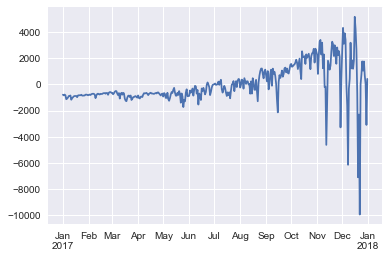

In [21]:
result.resid.plot()

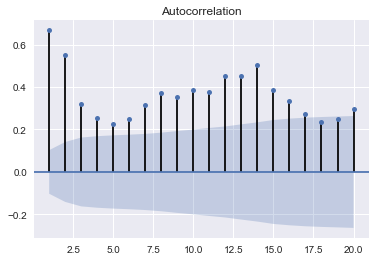

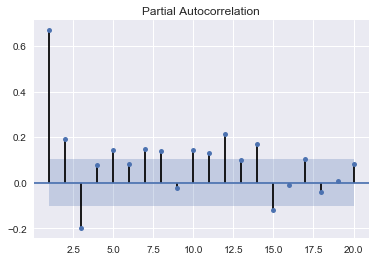

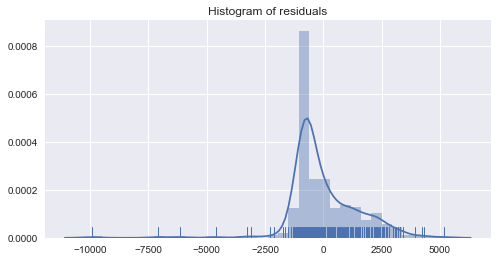

In [22]:
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
x = plot_acf(result.resid, lags=20, zero=False)
x = plot_pacf(result.resid, zero=False, lags=20)
ax = plt.figure(figsize=(8,4))
sns.distplot(result.resid, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

From the PACF plots of the in sample residuals, there is a significant auto-correlation at lags 3, 9 and 14.  Thus it is likely that the residuals point to a yet unknown variable that is influencing both the prices and volumes.  It does seem to be normally distributed around a zero mean.  However, a spurious correlation cannot be ruled out. 

# Linear regression of BTC based on other Crypto Prices (multiple regression)

Let's see if the use of other predictors can help us avoid a possible spurious regression.  We will now three other cyrpto prices (Etherium, Litecoin and XRP as possible predictors of BTC prices

In [23]:
btc_training = btc_scatter['2017']
btc_validation = btc_scatter[ (btc_scatter.index >= '01-01-2015') & (btc_scatter.index <= '31-12-2015') ]

eth = df[df.symbol=='ETH']
eth = eth.set_index(eth['date'])

xrp = df[df.symbol=='XRP']
xrp = xrp.set_index(xrp['date'])

ltc = df[df.symbol=='LTC']
ltc = ltc.set_index(ltc['date'])

#btc_training['log_volumes'] = 

#eth_training = eth[ (eth.index >= '01-01-2017') & (eth.index <= '31-12-2017') ]

#print(btc_training.describe())
eth.index = pd.to_datetime(eth.index.values)
ltc.index = pd.to_datetime(ltc.index.values)
xrp.index = pd.to_datetime(xrp.index.values)

eth_prices = eth['2017']['close'].shift(1)
xrp_prices = xrp['2017']['close'].shift(1)
ltc_prices = ltc['2017']['close'].shift(1)
  
result = sm.ols(formula="btc_prices ~ eth_prices + xrp_prices + ltc_prices", data=btc_training).fit()
display( result.summary())
#btc_training.plot.scatter(x='btc_close', y='btc_volume')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             btc_prices   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     758.6
Date:                Sat, 26 May 2018   Prob (F-statistic):          3.32e-155
Time:                        14:49:07   Log-Likelihood:                -3177.7
No. Observations:                 364   AIC:                             6363.
Df Residuals:                     360   BIC:                             6379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    418.8316    133.425      3.139      0.002     156.441     681.223
eth_prices     9.3141      0.965      9.654      0.000       7.417      11.211
xrp_prices -3670.1064    551.079     -6.660      0.000   -4753.845   -2586.368
ltc_prices    45.4327      2.885     15.750      0.000      39.760      51.105
==============================================================================
Omnibus:                      176.459   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1493.637
Skew:                           1.845   Prob(JB):                         0.00
Kurtosis:                      12.213   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

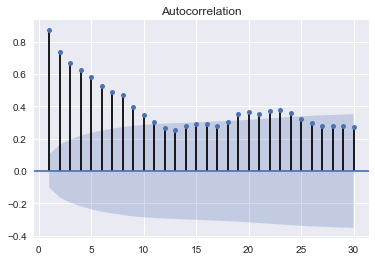

In [24]:
x = plot_acf(result.resid, zero=False, lags=30)  
# a hack to avoid two plots being rendered by plot_acf by assigning it's return value to a variable which prevents Jupyter from trying to display it

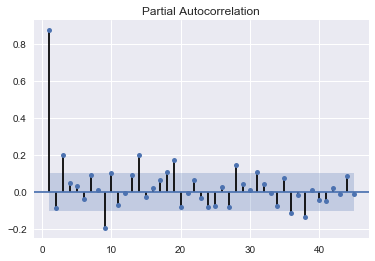

In [25]:
x = plot_pacf(result.resid, zero=False, lags=45)

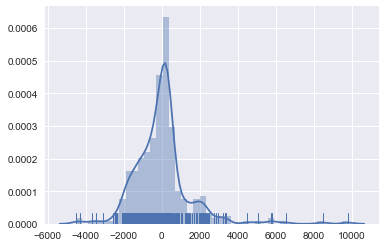

In [26]:
sns.distplot(result.resid, kde=True, rug=True, hist = True)

There is still a high degree of auto-correlation in the residuals which indicates that there are other factors which are determining the BTC prices.

# Examining auto-correlation within BTC prices

To understand what's behind this auto-correlation, I decided to plot the BTC prices against itself with a lag of 1.  I also wanted to checked if using a Log transformation would yield new insights.

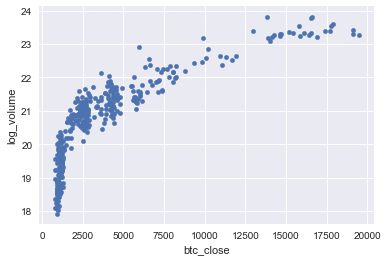

In [27]:
btc_scatter
btc_scatter['log_volume'] = (btc_scatter['btc_volume'].apply(np.log))
btc_scatter['2017'].plot.scatter(x='btc_close', y='log_volume')

# How do I take out the influence of any auto-correlation in my time series?

At this point, it became clear to me that there are two possible approaches I can take.   One approach was to exploit any trend or seasonality in my data.  The second approach was to remove any trend, seasonality and auto-correlation in my data, treating it purely as a white noise and then predicting from there. 

# Calculating 1 order differentials in the BTC time series

In [28]:
btc_shift = btc_scatter.shift(1)

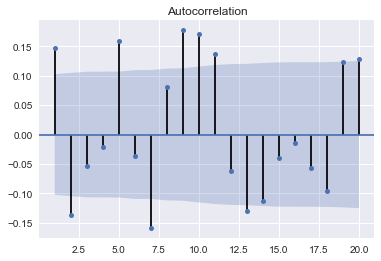

In [29]:
btc_diff = btc_scatter - btc_shift
x = plot_acf(btc_diff['2017']['btc_close'], lags=20, zero = False)

This didn't help as the ACF plot above suggests.   Let's try a weekly difference instead of a daily difference.

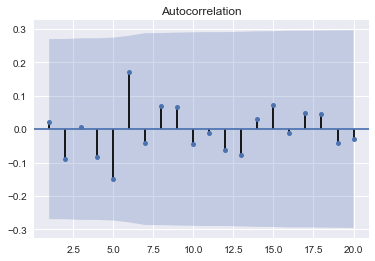

In [30]:
btc_diff_weekly = btc_diff.resample("W").mean()
x = plot_acf(btc_diff_weekly['2017']['btc_close'], lags=20, zero = False)

The weekly difference did remove auto-correlation as seen in the ACF plot above.  However, this has to be taken with a pinch of salt as what use in their in a weekly prediction of cryptocs which vary constantly 24/7 (crypto markets never close).   However, let's retain this line of thought for purely analysis purposes below. 

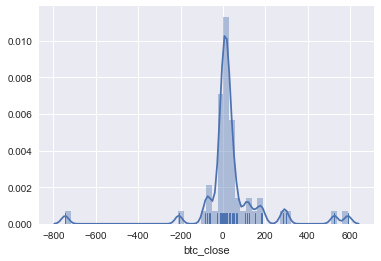

In [31]:
sns.distplot(btc_diff_weekly['2017']['btc_close'], kde=True, rug=True, hist = True)

As expected, I got nearly a white noise series as seen the ACF plot below.  Can I do something with this? 

# So the weekly difference is indeed a stationary series. How can I exploit this in forecasting? 

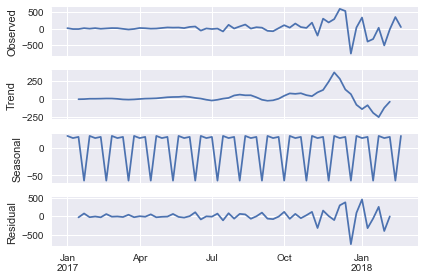

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res_diff = sm.tsa.seasonal_decompose(btc_diff_weekly['2017':]['btc_close'], freq=4, model='additive')
x = res_diff.plot()

How do I interpret this?  It shows a negative seasonality??

# Now extracting and using Trend and Seasonality in BTC weekly prices

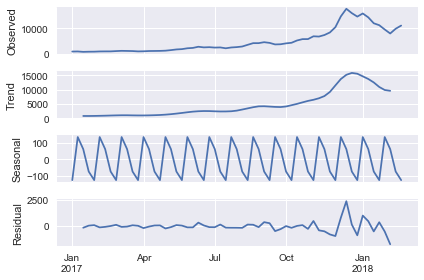

In [33]:
btc_weekly = btc_scatter.resample('W').mean()
# decompose time series into components
res = sm.tsa.seasonal_decompose(btc_weekly['2017':]['btc_close'], freq=4, model='additive')
x = res.plot()

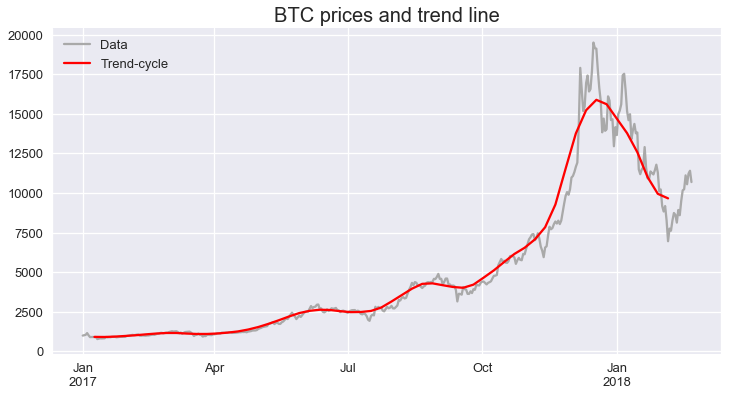

In [34]:
sns.set_context("talk")
sns.set_style('darkgrid') 
%matplotlib inline
from IPython.display import display, HTML, Javascript
from matplotlib.pyplot import xlabel, ylabel, title, legend

# plot original data
ax = btc_scatter['2017':]['btc_close'].plot(color="darkgrey", figsize=(12,6))
# plot trend component
res.trend.plot(ax=ax, color="red")
# formatting
title("BTC prices and trend line",fontsize=20)
#ylabel("Prices in $")
ax.legend(['Data', 'Trend-cycle']);
#plt.close()

What I decided to do next? 
1. Do seasonally adjusted forecasts using STL (Loess)
2. Measure strength of trend and seasonality
3. Measure quality of the forecasts in across these different models
4. Estimation using Simple Exponential Smoothing
5. Separate into training, validation and test data sets - and measure the error on each 
6. Provide forecasts for out of sample data with confidence intervals at 95% accuracy
7. Plot distribution of the residuals above

and a question that remained in my mind as I continued.
1. What does seasonality in the above seasonal decomposition really mean? 

In [35]:
display(pd.infer_freq(btc_weekly.index))

'W-SUN'

quick check above that the frequency in my weekly timeseries is a weekly one

# Let's do a Portmanteau test for autocorrelation

In [36]:
from statsmodels.stats.diagnostic import acorr_ljungbox
h = 10
# calculate Ljung-Box and Box-Pierce test
lbvalue, lbpvalue, bpvalue, bppvalue = acorr_ljungbox(btc_weekly['2017'].btc_close.dropna(), lags=h,  boxpierce=True)
lbvalue[h-1], lbpvalue[h-1]
# display Ljung-Box test stats
df = pd.DataFrame(columns=['X-squared','p-value'], index = range(1))
df['X-squared'] = lbvalue[h-1]; df['p-value'] = lbpvalue[h-1];
display("Ljung-Box values before applying weekly differencing")
df

'Ljung-Box values before applying weekly differencing'

,X-squared,p-value
0,148.105485,9.141726e-27


The p-values are quite small indicating that there is still a high degree of auto-correlation present in the weekly prices.  This is not surprising at all as the weekly prices are indeed auto-correlated with the previous week's prices, hence Ljung-Box test can indeed be used to look at any remaining auto-correlation in the residuals or differenced prices. 

In [37]:
h = 10
# calculate Ljung-Box and Box-Pierce test
lbvalue, lbpvalue, bpvalue, bppvalue = acorr_ljungbox(btc_diff_weekly['2017'].btc_close.dropna(), lags=h,  boxpierce=True)
lbvalue[h-1], lbpvalue[h-1]
# display Ljung-Box test stats
df = pd.DataFrame(columns=['X-squared','p-value'], index = range(1))
df['X-squared'] = lbvalue[h-1]; df['p-value'] = lbpvalue[h-1];
display("Ljung-Box values after applying weekly differencing")
df

'Ljung-Box values after applying weekly differencing'

,X-squared,p-value
0,4.900054,0.897754


The p-values are high indicating that there is little auto-correlation present first order differences of weekly prices. The differencing operation on weekly prices has made a tangible difference on removing the auto-correlation

# Forecasting with a Simple Exponential Forecasting model (SES) using Insample and Out of Sample data sets

An in-sample data set of two quarters of BTC price data from 01-Apr-2017 to 30-Sep-2017 is used below to create an SES model. The model thus derived is used to plot the forecast values in the same data set.  Further tests below apply the same model to a previously unseen validation set of BTC price data in Q4. 
However, I decided to stick with daily BTC data instead of weekly differences which I planned to revisit later. 

In [38]:
# Training (in-sample) accuracy
def accuracy(y_cap, y, y_train, is_ts=True, is_seasonal=True):
    e = y - y_cap
    ME = e.mean()
    RMSE = (e**2.).mean()**0.5
    MAE  = e.abs().mean()
    MAPE = (100.*e/y).abs().mean()
    freq = pd.infer_freq(y_train.index)
    display("Frequency of training data set is " + freq)
    q = e/((y_train-y_train.shift({'W':7,'D':1}[freq])).abs()).mean() if is_ts and is_seasonal else \
        e/((y_train-y_train.shift(1)).abs()).mean() if is_ts else \
        e/((y_train-y_train.mean()).abs()).mean()
    MASE = q.abs().mean()
    return ME, RMSE, MAE, MAPE, MASE

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

btc_training = btc_scatter['01-04-2017':'30-09-2017']

# fit simple exponential smoothing model
fit3 = SimpleExpSmoothing(btc_training.btc_close).fit()

# also obtain other fit with Holt's method which extends SES with a trend function
#fit4 = Holt(btc_training.btc_close, exponential=False).fit(optimized=True)

# display forecast accuracy measures
results = pd.DataFrame(columns = ['ME','RMSE','MAE','MAPE','MASE'])
results.loc['results'] = accuracy(fit3.fittedvalues, btc_training.btc_close, btc_training.btc_close)

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


'Frequency of training data set is D'

In [40]:
display(results)
#btc_training.head()

,ME,RMSE,MAE,MAPE,MASE
results,12.709111,120.629527,74.041651,3.205194,0.995873


These error measures will be used to measure the performance of the forecast and compare against different forecast models that we will use further.

In [41]:
display("Forecast values: " + str(fit3.fcastvalues))

'Forecast values: [4326.00975272]'

In [42]:
fit3.fittedvalues.median()

1864.2106444124731

# Plotting the in-sample forecasts from SES

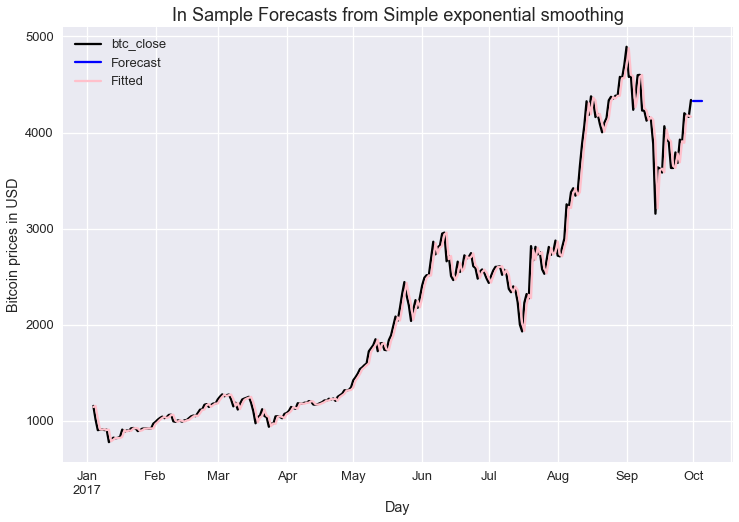

In [43]:
# plot original data
ax = btc_training.btc_close.plot(color='black', figsize=(12,8))
# simple exponential smoothing plot
fit3.forecast(5).rename('Forecast').plot( ax=ax, color='blue', legend=True)
fit3.fittedvalues.plot( ax=ax, color='pink', label = 'Fitted')
# plot formatting
ax.set_xlabel('Day')
ax.set_ylabel('Bitcoin prices in USD')
ax.set_title('In Sample Forecasts from Simple exponential smoothing', fontsize = 18)
ax.legend(loc = 'upper left')
#plt.close()

# Intrepreting the In-Sample forecast results from SES

1. The Mean Error is very low indicating a good in-sample forecast which is also visualized in the plot where the SES forecast plot closely mirrors the actual price plot among the in-sample values. 
2. The Percentage Error (MAPE) is also extremely low at 3% indicating a good forecast performance.  This being a unit free measure, we can use this to compare different forecast models as we try out different approaches
3. The Mean Absolute Scaled Error (MASE) is less than 1 indicating that this model provides a better forcast than an average naive forecast on the in-sample data.

# Testing model performance with Out of Sample data using a Validation Set

A validation set of BTC price data in Q4 - 01-Oct-2017 to 31-Dec-2017 - is used to test the generalization capabilty of the SES model.  

In [44]:
btc_validation = btc_scatter['2017-10-01':'2017-12-31']

In [45]:
btc_validation.loc[:,"btc_close_ycap_SES"] = fit3.fcastvalues

display(btc_validation.tail())

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,btc_close,btc_volume,log_volume,btc_close_ycap_SES
2017-12-27,15838.5,12487600000,23.248002,4326.009753
2017-12-28,14606.5,12336500000,23.235828,4326.009753
2017-12-29,14656.2,13025500000,23.290175,4326.009753
2017-12-30,12952.2,14452600000,23.394140,4326.009753
2017-12-31,14156.4,12136300000,23.219467,4326.009753


In [46]:
# testing accuracy (out-of-sample)
def test_accuracy(y_cap, y, is_ts=True, is_seasonal=True):
    e = y - y_cap
    ME = e.mean()
    RMSE = (e**2.).mean()**0.5
    MAE  = e.abs().mean()
    return ME, RMSE, MAE,

In [47]:
results = pd.DataFrame(columns = ['ME','RMSE','MAE'])
results.loc['results-SES'] = test_accuracy(btc_validation.btc_close_ycap_SES, btc_validation.btc_close)

In [48]:
display(results)

,ME,RMSE,MAE
results-SES,5181.366443,6877.078254,5183.652954


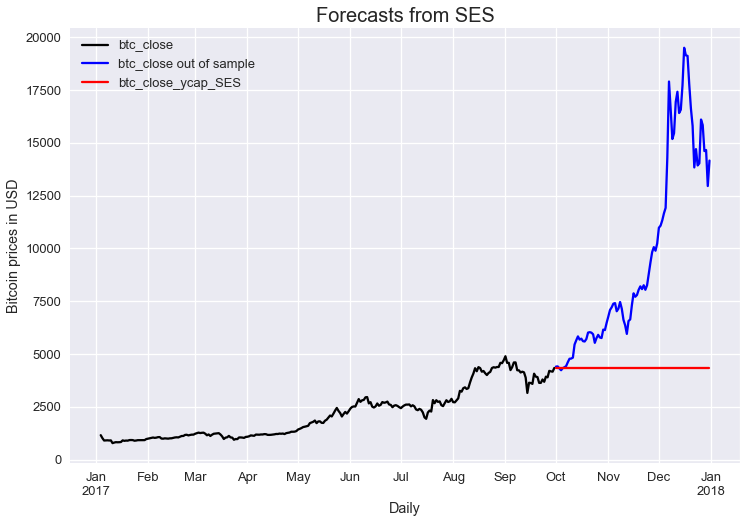

In [49]:
# plot
ax = btc_training.btc_close.plot(color="black", figsize=(12,8), legend = True)
btc_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="btc_close out of sample")
btc_validation.btc_close_ycap_SES.plot(ax=ax, color = 'red', legend = True)
# plot formatting
ax.set_title("Forecasts from SES", fontsize = 20)
xlabel("Daily"); ylabel("Bitcoin prices in USD");

# Obtain another fit with Holt's linear method which extends SES with a trend function

Used the parameter exponential=True which provided a better fit, likely on account of the increasing trend of BTC prices during the validation period. 

In [50]:
fit4 = Holt(btc_training.btc_close, exponential=True).fit(optimized=True)

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [51]:
fcast4 = fit4.forecast(92) # 92 days in the validation set from 01-Sep-2017 to 31-Dec-2017

In [52]:
display(fcast4.tail())

2017-12-27    6337.716487
2017-12-28    6365.285388
2017-12-29    6392.974212
2017-12-30    6420.783482
2017-12-31    6448.713722
Freq: D, dtype: float64

In [53]:
btc_validation.loc[:,"btc_close_ycap_SES_Holt_Trend"] = fcast4.values

results.loc['results-SES_Holt_Trend'] = test_accuracy(btc_validation.btc_close_ycap_SES_Holt_Trend, btc_validation.btc_close)

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


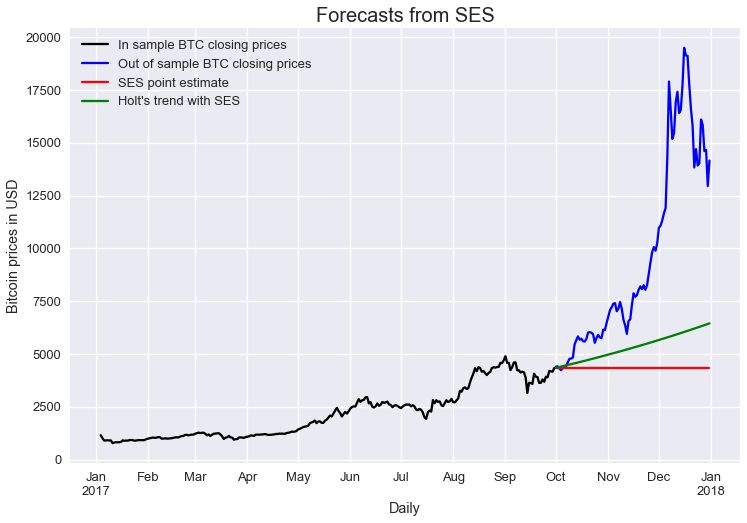

In [54]:
# plot
ax = btc_training.btc_close.plot(color="black", figsize=(12,8), legend = True, label="In sample BTC closing prices")
btc_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="Out of sample BTC closing prices")
btc_validation.btc_close_ycap_SES.plot(ax=ax, color = 'red', legend = True, label ='SES point estimate')
fcast4.plot(ax=ax, color = 'green', legend = True, label='Holt\'s trend with SES')
# plot formatting
ax.set_title("Forecasts from SES", fontsize = 20)
xlabel("Daily"); ylabel("Bitcoin prices in USD");

# Residual analysis of SES Holt's Linear Method

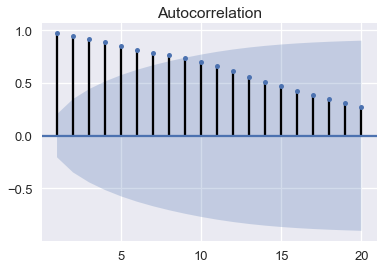

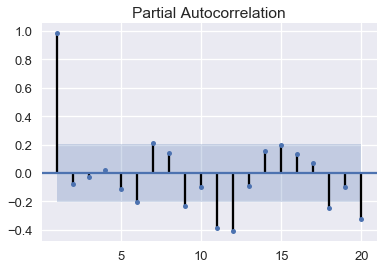

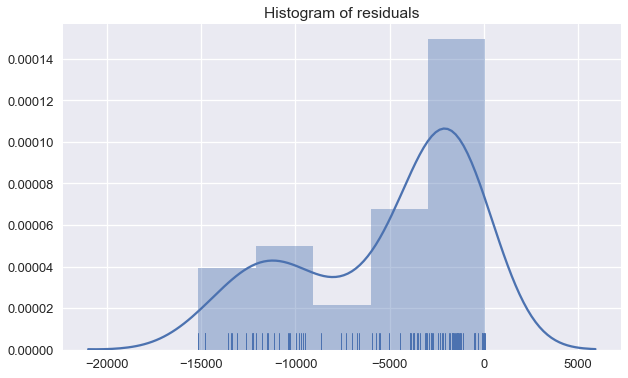

In [55]:
residuals_SES = btc_validation.btc_close_ycap_SES - btc_validation.btc_close
x = plot_acf(residuals_SES, zero=False, lags=20)
x = plot_pacf(residuals_SES, zero=False, lags=20)
ax = plt.figure(figsize=(10,6))
sns.distplot(residuals_SES, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

In [56]:
residuals_SES.mean()

-5181.3664429342125

The residuals show a high degree of auto-correlation upto 8 lags.  This indicates that there is some information still left in the residuals which can be used to improve the forecasts.  Also, the residuals have a non zero mean which indicates bias in the forecasts. It is not an efficient forecast model.

# Let's repeat SES Holt Trent method with weekly prices instead of daily prices

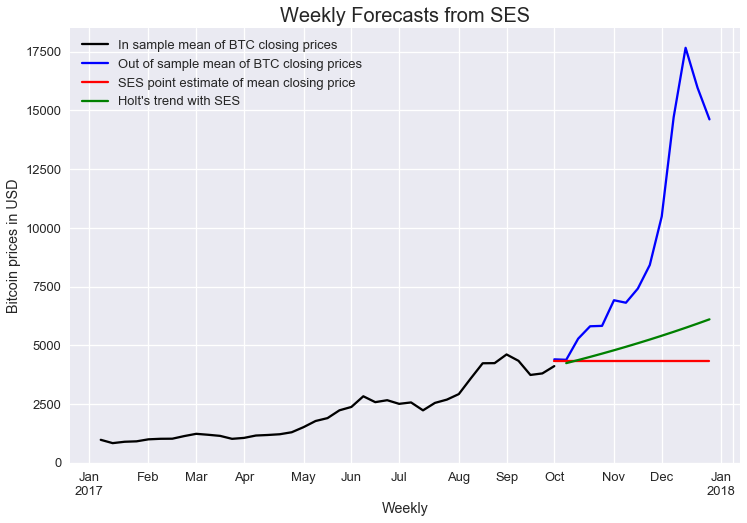

In [57]:
btc_weekly_training = btc_training.resample('W').mean()
btc_weekly_validation = btc_validation.resample('W').mean()

fit4 = Holt(btc_weekly_training.btc_close, exponential=True, damped=False).fit(optimized=True)

fcast4 = fit4.forecast(13) # 13 weeks in the validation set from 01-Sep-2017 to 31-Dec-2017
fcast4
# plot
ax = btc_weekly_training.btc_close.plot(color="black", figsize=(12,8), legend = True, label="In sample mean of BTC closing prices")
btc_weekly_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="Out of sample mean of BTC closing prices")
btc_weekly_validation.btc_close_ycap_SES.plot(ax=ax, color = 'red', legend = True, label ='SES point estimate of mean closing price')
fcast4.plot(ax=ax, color = 'green', legend = True, label='Holt\'s trend with SES')
# plot formatting
ax.set_title("Weekly Forecasts from SES", fontsize = 20)
xlabel("Weekly"); ylabel("Bitcoin prices in USD");

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1285: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


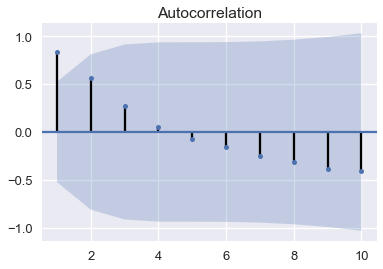

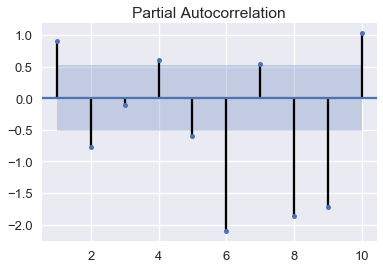

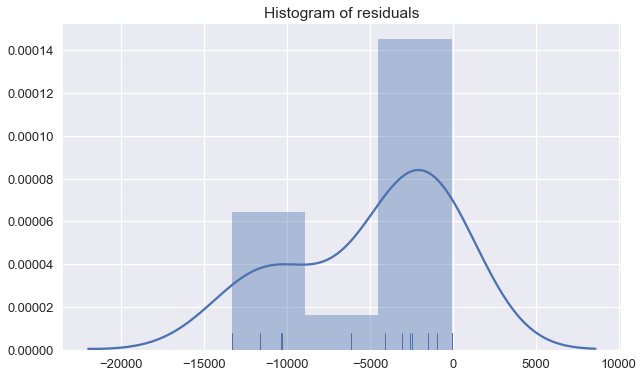

In [58]:
residuals_SES = btc_weekly_validation.btc_close_ycap_SES - btc_weekly_validation.btc_close
x = plot_acf(residuals_SES, zero=False, lags=10)
x = plot_pacf(residuals_SES, zero=False, lags=10)
ax = plt.figure(figsize=(10,6))
sns.distplot(residuals_SES, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

Weekly sampling did not make any visible difference to the quality of the forecast and autocorrelation within the residuals.  Hence I decided to stick with daily prices for now.   I also found that Holt method is gives significant weightage to the recent trend and it was possible to get significantly divergent forecast results by doing sum of weekly prices instead of mean of weekly prices. This was because the weekly sum showed a declining trend while the weekly mean showed an increaing trend.   

Sampling on a monthly sum basis provided far better results as seen below.  

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:70: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)


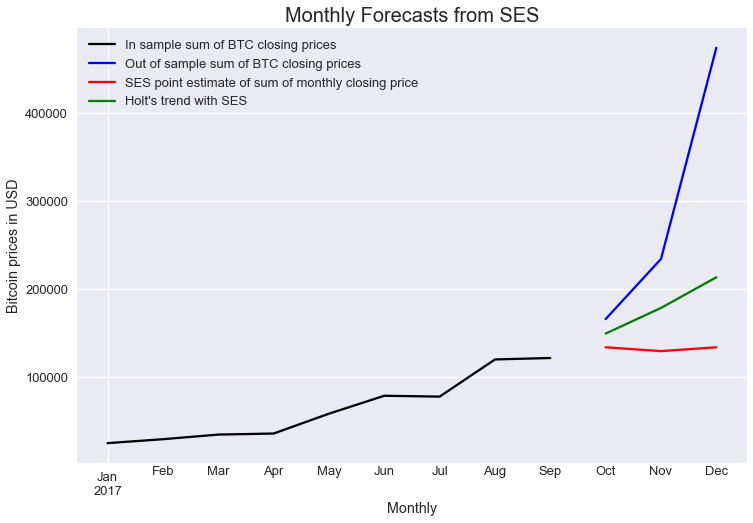

In [59]:
btc_monthly_training = btc_training.resample('M').sum()
btc_monthly_validation = btc_validation.resample('M').sum()

fit4 = Holt(btc_monthly_training.btc_close, exponential=True, damped=False).fit(optimized=True)

fcast4 = fit4.forecast(3) # 3 months in the validation set from 01-Sep-2017 to 31-Dec-2017
fcast4
# plot
ax = btc_monthly_training.btc_close.plot(color="black", figsize=(12,8), legend = True, label="In sample sum of BTC closing prices")
btc_monthly_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="Out of sample sum of BTC closing prices")
btc_monthly_validation.btc_close_ycap_SES.plot(ax=ax, color = 'red', legend = True, label ='SES point estimate of sum of monthly closing price')
fcast4.plot(ax=ax, color = 'green', legend = True, label='Holt\'s trend with SES')
# plot formatting
ax.set_title("Monthly Forecasts from SES", fontsize = 20)
xlabel("Monthly"); ylabel("Bitcoin prices in USD");

# Forecasting with ARIMA

In [60]:
from statsmodels.tsa.stattools import kpss
res = kpss(btc_training.btc_close)
print("kpss=%s, pvalue=%s lag=%s"%res[0:3])
pd.DataFrame(res[3],columns = ['10%','5%','2.5%','1%'], index=['critical values'])

kpss=1.5203266575991836, pvalue=0.01 lag=16


C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


,10%,5%,2.5%,1%
critical values,0.347,0.463,0.574,0.739


KPSS test indicates that differencing is required

Now I obtain the ARIMA order to be used later.   Note that the following code can be run only after you create an 
environment variable X13_PATH and set it to the location of the folder where your x13as exe or binary is located (depending on your OS). 
This x13as executable can be downloaded from https://www.census.gov/srd/www/x13as/

In [61]:
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.tsa.x13 as x13
from statsmodels.tsa.arima_model import ARIMA

btc_monthly = btc_scatter.resample("M").mean()

res1 = x13.x13_arima_select_order(btc_monthly.btc_close, maxorder=(0,0), x12path=None, prefer_x13=True, log=False)
                                
print("arima order %s"%(res1.order,))

##CAN only be used if the TS is stationary might need to diff(1).dropna()
res2 = arma_order_select_ic(btc_monthly.btc_close, ic=['aic', 'bic'], trend='c', max_ar=3, max_ma=3)
print("aic arma order %s"%(res2.aic_min_order,))
print("bic arma order %s"%(res2.bic_min_order,))


C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\x13.py:182: X13Warning: NOTE: Unable to test AO2017.Dec due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2017.Nov due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test AO2017.Oct due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test AO2017.Jun due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: 

arima order (0, 1, 0)


C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: Runti

aic arma order (3, 2)
bic arma order (1, 3)


C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


I got the following error when I ran it for daily prices. 
_"ValueError: Only monthly and quarterly periods are supported. Please report or send a pull request if you want this extended."_
I then changed it to a monthly price series and was then able to run the code successfully and use the automatically calculated ARIMA orders above for further analysis. 

In [62]:
from statsmodels.tsa.arima_model import ARIMA

# fit naive forecast (=ARIMA(0,0,0))
fit5 = ARIMA(btc_training.btc_close, (2,1,2)).fit() 
#fit5 = ARIMA(btc_diff_weekly.btc_close, (1,0,1)).fit() #This is the quivalent of a naive forecast
#fcast5 = fit5.forecast(90)

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [63]:
fit = ARIMA(btc_training.btc_close, (2,1,2)).fit(trend='c') 
fit.summary()

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.btc_close   No. Observations:                  269
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1665.052
Method:                       css-mle   S.D. of innovations            116.984
Date:                Sat, 26 May 2018   AIC                           3342.104
Time:                        14:49:34   BIC                           3363.672
Sample:                    01-05-2017   HQIC                          3350.766
                         - 09-30-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.7534      7.171      1.639      0.102      -2.302      25.808
ar.L1.D.btc_close    -0.7972      0.027    -29.188      0.000      -0.851      -0.744
ar.L2.D.btc_close    -0.9437      0.025    -38.232      0.000      -0.992      -0.895
ma.L1.D.btc_close     0.7557      0.018     42.994      0.000       0.721       0.790
ma.L2.D.btc_close     1.0000      0.035     28.825      0.000       0.932       1.068
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4224           -0.9388j            1.0294           -0.3173
AR.2           -0.4224           +0.9388j            1.0294            0.3173
MA.1           -0.3779           -0.9259j            1.0000           -0.3117
MA.2           -0.3779           +0.9259j            1.0000            0.3117
-----------------------------------------------------------------------------
"""

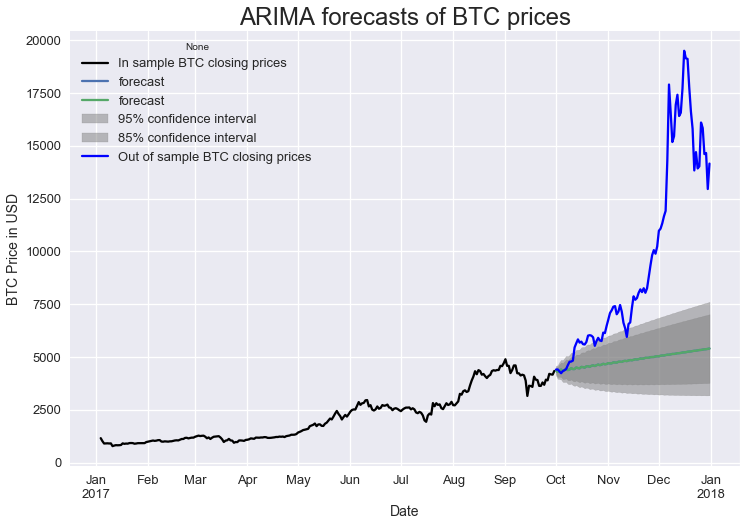

In [64]:
# plot seasonally adjusted data
ax = btc_training.btc_close.plot(figsize=(12,8), color = 'black', label="In sample BTC closing prices")
# plot forecast and 95% CI
fit5.plot_predict(start='2017-10-01', end='2017-12-31', alpha=0.05, plot_insample=False, ax=ax)# 95% CI
#little hack to get the two confidence intervals 
fit5.plot_predict(start='2017-10-01', end='2017-12-31', alpha=0.15, plot_insample=False, ax=ax) # 85% CI
# format
ylabel("BTC Price in USD", fontsize = 14); xlabel("Date", fontsize = 14);
btc_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="Out of sample BTC closing prices")
ax.set_title('ARIMA forecasts of BTC prices',fontsize= 24);

# Evaluating forecast accuracy of the ARIMA model

The ARIMA fitted prediction object returns the differenced forecast values by default.  Using the typ='levels' parameter below allowed me to get the levels of the prices instead of merely the differenced values.

In [65]:
predicted_arima = fit5.predict(start='2017-10-01', end='2017-12-31', typ='levels')

btc_validation.loc[:,"btc_close_ycap_ARIMA"] = predicted_arima.values
display(btc_validation.tail())

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,btc_close,btc_volume,log_volume,btc_close_ycap_SES,btc_close_ycap_SES_Holt_Trend,btc_close_ycap_ARIMA
2017-12-27,15838.5,12487600000,23.248002,4326.009753,6337.716487,5347.550516
2017-12-28,14606.5,12336500000,23.235828,4326.009753,6365.285388,5363.097400
2017-12-29,14656.2,13025500000,23.290175,4326.009753,6392.974212,5368.100199
2017-12-30,12952.2,14452600000,23.394140,4326.009753,6420.783482,5381.655168
2017-12-31,14156.4,12136300000,23.219467,4326.009753,6448.713722,5398.342659


The predicted results table above for the validation set now contains predicted values extracted via both SES and ARIMA.  Let's see which one is more accurate. 

In [66]:
results.loc['results-ARIMA'] = test_accuracy(btc_validation.btc_close_ycap_ARIMA, btc_validation.btc_close)
display(results)

,ME,RMSE,MAE
results-SES,5181.366443,6877.078254,5183.652954
results-SES_Holt_Trend,4179.136778,5766.759481,4188.484305
results-ARIMA,4647.510367,6293.091794,4652.571787


A comparative view of the error measures above indicate that the SES Holt Trend method outperforms the ARIMA model in this particular instance. 

# Residual Analysis of ARIMA forecasts

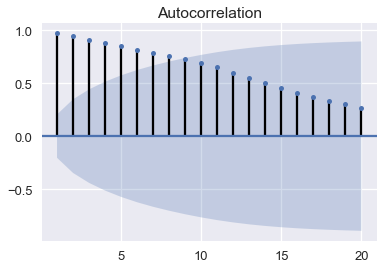

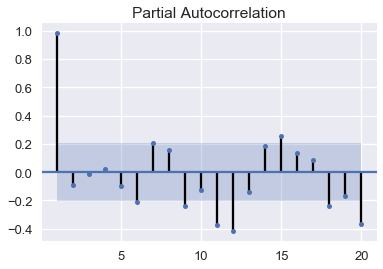

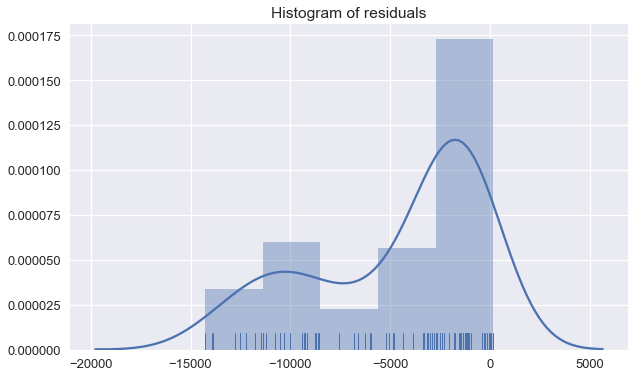

In [67]:
residuals_ARIMA = btc_validation.btc_close_ycap_ARIMA - btc_validation.btc_close
x = plot_acf(residuals_ARIMA, zero=False, lags=20)
x = plot_pacf(residuals_ARIMA, zero=False, lags=20)
ax = plt.figure(figsize=(10,6))
sns.distplot(residuals_ARIMA, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

# Let's compare these results against a Naive method of forecasting as a benchmark 

In [68]:
btc_validation_naive = btc_scatter["2017-09-30":"2017-12-31"].shift(1) # shift one step ahead for naive forecasts
results.loc['results-Naive'] = test_accuracy(btc_validation_naive.btc_close, btc_validation.btc_close)
display(results)

,ME,RMSE,MAE
results-SES,5181.366443,6877.078254,5183.652954
results-SES_Holt_Trend,4179.136778,5766.759481,4188.484305
results-ARIMA,4647.510367,6293.091794,4652.571787
results-Naive,106.714022,776.000750,478.122717


These results indicate that the Naive forecasts outperforms the other methods by a significant measure. 

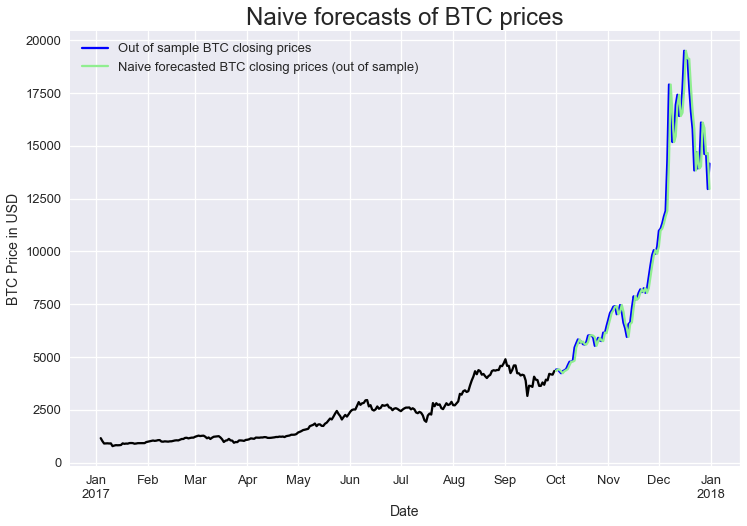

In [69]:
# plot seasonally adjusted data
ax = btc_training.btc_close.plot(figsize=(12,8), color = 'black', label="In sample BTC closing prices")
# format
ylabel("BTC Price in USD", fontsize = 14); xlabel("Date", fontsize = 14);
btc_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="Out of sample BTC closing prices")
btc_validation_naive.btc_close.plot(ax=ax, color='lightgreen', legend=True, label="Naive forecasted BTC closing prices (out of sample)")
ax.set_title('Naive forecasts of BTC prices',fontsize= 24);

# Residual Analysis of Naive method

-106.71402173913044

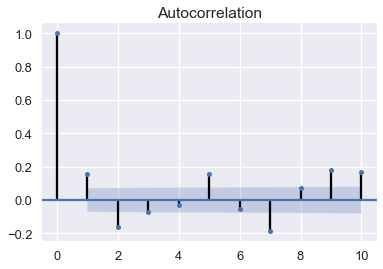

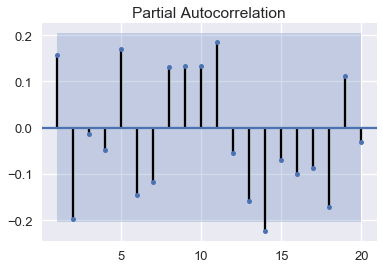

In [70]:
residuals_Naive = (btc_validation_naive.btc_close - btc_validation.btc_close).dropna()
x = plot_acf(residuals_Naive, zero=True, alpha=.5, lags=10)
x = plot_pacf(residuals_Naive, zero=False, lags=20)
residuals_Naive.mean()


With the trend information removed in the ACF plot above, resulting in the PACF plot, there does not appear to be any significant auto-correlation left in the residuals.    It is normally distributed with a slight non zero mean.   In my view, it is an an efficient forecast compared to the other methods

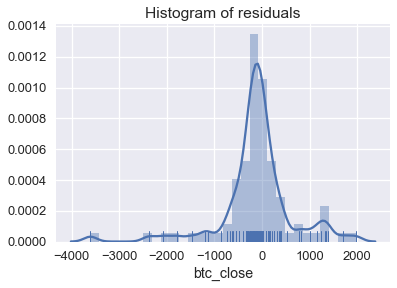

In [71]:
sns.distplot(residuals_Naive, kde=True, rug=True).set_title('Histogram of residuals');

# Levelling the playing field - How does ARIMA perform on in-sample forecasts?

If you have followed the above Naive Forecast, you will notice that Naive has a distinct advantage over other forecasting methods in that it is able to able to work off the previous day forecasts (derived by a 1-shift of the time series).  
All the other forecast models were built off a in-sample data set and then required to forecast on a completely new out-of-sample data set.   
To level the playing field, the below section trains ARIMA on a 1-shift timeseries on the validation set itself thereby simulating the conditions under which the previous Naive forecast was done. 

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.btc_close   No. Observations:                  203
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1603.561
Method:                       css-mle   S.D. of innovations            651.330
Date:                Sat, 26 May 2018   AIC                           3219.123
Time:                        14:49:42   BIC                           3239.002
Sample:                    08-03-2017   HQIC                          3227.165
                         - 02-21-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                43.3994     45.915      0.945      0.346     -46.591     133.390
ar.L1.D.btc_close     0.5018      0.043     11.701      0.000       0.418       0.586
ar.L2.D.btc_close    -0.9710      0.033    -29.313      0.000      -1.036      -0.906
ma.L1.D.btc_close    -0.4611      0.058     -7.951      0.000      -0.575      -0.347
ma.L2.D.btc_close     0.9365      0.060     15.685      0.000       0.819       1.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2584           -0.9814j            1.0148           -0.2090
AR.2            0.2584           +0.9814j            1.0148            0.2090
MA.1            0.2462           -1.0036j            1.0334           -0.2117
MA.2            0.2462           +1.0036j            1.0334            0.2117
-----------------------------------------------------------------------------
"""

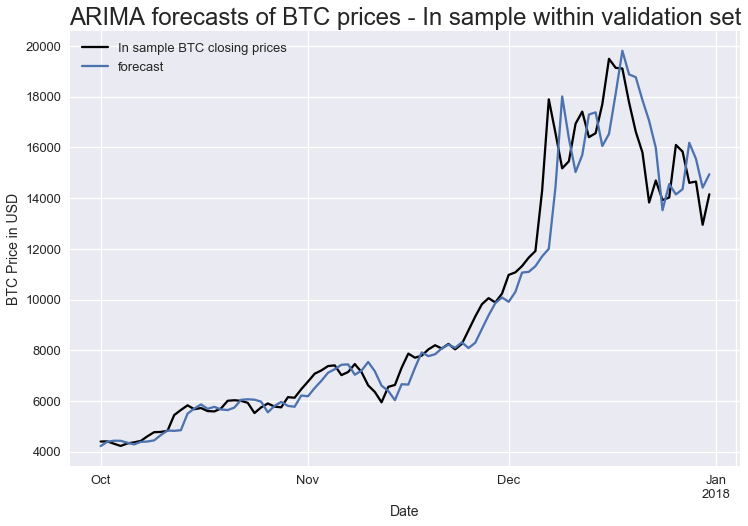

In [72]:
arima_training = (btc_scatter['2017-08-01':].shift(1)).dropna()

fit = ARIMA(arima_training.btc_close, (2,1,2)).fit(trend='c') 
display(fit.summary())
# plot seasonally adjusted data
ax = btc_validation.btc_close.plot(figsize=(12,8), color = 'black', label="In sample BTC closing prices")
# plot forecast and 95% CI
fit.plot_predict(start='2017-10-01', end='2017-12-31', alpha=0.001, plot_insample=False, ax=ax)# 95% CI
#little hack to get the two confidence intervals 
#fit.plot_predict(start='2017-10-01', end='2017-12-31', alpha=0.15, plot_insample=True, ax=ax) # 85% CI
# format
ylabel("BTC Price in USD", fontsize = 14); xlabel("Date", fontsize = 14);
#btc_validation.btc_close.plot(ax=ax, color='blue', legend=True, label="Out of sample BTC closing prices")
ax.set_title('ARIMA forecasts of BTC prices - In sample within validation set',fontsize= 24);

# Comparision of forecasting performance across models

In [73]:
predicted_arima = fit.predict(start='2017-10-01', end='2017-12-31', typ='levels')

btc_validation.loc[:,"btc_close_ycap_In_Sample_ARIMA"] = predicted_arima.values
results.loc['results-ARIMA-InSample'] = test_accuracy(btc_validation.btc_close_ycap_In_Sample_ARIMA, btc_validation.btc_close)
display(results)

C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\k.f.venkataraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ME,RMSE,MAE
results-SES,5181.366443,6877.078254,5183.652954
results-SES_Holt_Trend,4179.136778,5766.759481,4188.484305
results-ARIMA,4647.510367,6293.091794,4652.571787
results-Naive,106.714022,776.000750,478.122717
results-ARIMA-InSample,159.180720,1163.072572,738.173404


Naive wins hands down with the lowest Mean Error (ME), Root Mean Square Error (RMSE) and Mean Average Error (MAE).   This is followed by ARIMA-In-Sample which yielded it's performance with a differencing of 1.  
The reasons for this is possibly because BTC daily prices resemble a white noise series.  Given a short forecasting window like 1 day, the naive forecast yields the best results, as it simply uses the previous day's price as forecast.  The ARIMA and SES forecast methods on the other hand also factor in the previous prices which probably increases the probability of higher forecast errors.

# Conclusion and Further areas to explore

While the Naive forecasts have performed the best at a daily forecasting level, as the forecasting window increases to a weekly or monthly level, the SES (Holt Trend) or ARIMA models have shown the ability to capture the trend (and seasonality, if any) in the data set.  However, this was not tested in this notebook and can be done as a further exploration. 

In the particular domain of interest chosen here, which is cryptocurrency price estimation, it is also doubtful whether weekly or monthly forecast will have any practical utility.   However, for other kinds of time series which do not resemble a white noise series, I expect that these other forecasting methods will perform better, given the limitation of the Naive forecast to base itself on the last known value. 
While there does appears to be some seasonality within the weekly BTC prices (as detected at a frequency=4 in ACF plot), this can potentially be exploited in a Seasonal Arima forecast. 